# Task is to first do standard scaling i.e. feature engg and then validate the model using k fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')
df=Churn.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

In [3]:
Churn.isnull() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

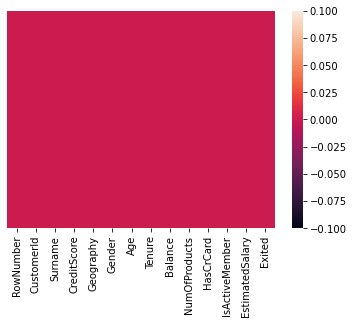

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)#,cbar=True,cmap='viridis')   #no missing cases

<AxesSubplot:xlabel='Exited', ylabel='count'>

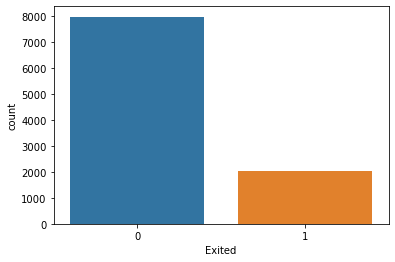

In [5]:
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

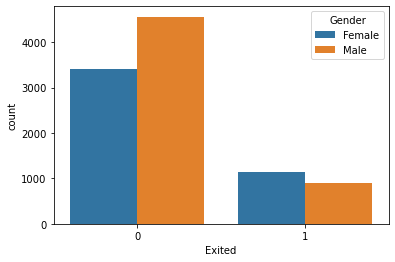

In [6]:
sns.countplot(x='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

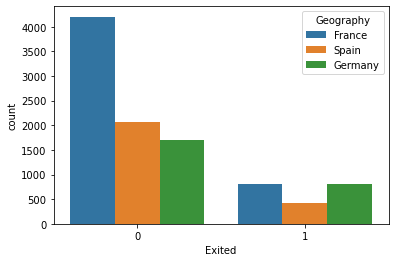

In [7]:
sns.countplot(x='Exited', hue='Geography', data=df)

Data cleaning

In [8]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
df=df.drop(to_drop,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

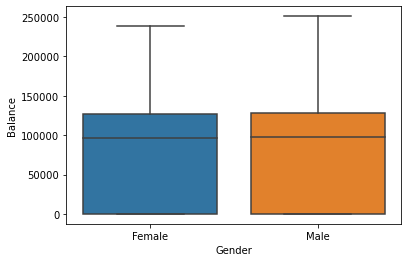

In [9]:
sns.boxplot(x='Gender',y='Balance',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

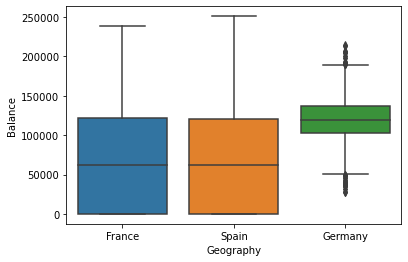

In [10]:
sns.boxplot(x='Geography',y='Balance',data=df)

##Using standardize feature engineering.

##using it for estimated salary

In [11]:
df.EstimatedSalary=(df.EstimatedSalary-df.EstimatedSalary.mean())/df.EstimatedSalary.std()

In [13]:
df.EstimatedSalary[:10]

0    0.021885
1    0.216523
2    0.240675
3   -0.108912
4   -0.365258
5    0.863607
6   -1.565409
7    0.334837
8   -0.437307
9   -0.493206
Name: EstimatedSalary, dtype: float64

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,-1.225786,1,1,1,0.021885,1
1,608,Spain,Female,41,1,0.117344,1,0,1,0.216523,0
2,502,France,Female,42,8,1.332987,3,1,0,0.240675,1
3,699,France,Female,39,1,-1.225786,2,0,0,-0.108912,0
4,850,Spain,Female,43,2,0.785689,1,1,1,-0.365258,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,-1.225786,2,1,0,-0.066416,0
9996,516,France,Male,35,10,-0.306363,1,1,1,0.027987,0
9997,709,France,Female,36,7,-1.225786,1,0,1,-1.008593,1
9998,772,Germany,Male,42,3,-0.022606,2,1,0,-0.125224,1


In [15]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(df['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [16]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [17]:
df.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.
pd.concat([df,Gender,Geo],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,-1.225786,1,1,1,0.021885,1,0,0,0
1,608,41,1,0.117344,1,0,1,0.216523,0,0,0,1
2,502,42,8,1.332987,3,1,0,0.240675,1,0,0,0
3,699,39,1,-1.225786,2,0,0,-0.108912,0,0,0,0
4,850,43,2,0.785689,1,1,1,-0.365258,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,-1.225786,2,1,0,-0.066416,0,1,0,0
9996,516,35,10,-0.306363,1,1,1,0.027987,0,1,0,0
9997,709,36,7,-1.225786,1,0,1,-1.008593,1,0,0,0
9998,772,42,3,-0.022606,2,1,0,-0.125224,1,1,1,0


In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,-1.225786,1,1,1,0.021885,1
1,608,41,1,0.117344,1,0,1,0.216523,0
2,502,42,8,1.332987,3,1,0,0.240675,1
3,699,39,1,-1.225786,2,0,0,-0.108912,0
4,850,43,2,0.785689,1,1,1,-0.365258,0


In [19]:
##BUILDING A LOGISTIC REGRESSION MODEL

In [20]:
##TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), 
                                                    df['Exited'], test_size=0.20, 
                                                    random_state=111)

Training and PRedicting

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
logmodel.coef_

array([[-0.00237606,  0.06519352, -0.03683193,  0.30414535, -0.0406587 ,
        -0.14029689, -1.23437388, -0.09633872]])

In [26]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1549,332
1,43,76


Evaluation

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,predictions))

[[1549   43]
 [ 332   76]]


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1592
           1       0.64      0.19      0.29       408

    accuracy                           0.81      2000
   macro avg       0.73      0.58      0.59      2000
weighted avg       0.79      0.81      0.77      2000



In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5796322297763327

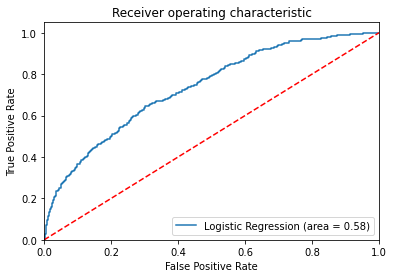

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [34]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5796322297763327

In [35]:
logmodel.predict_proba(X_test)

array([[0.90475104, 0.09524896],
       [0.62729809, 0.37270191],
       [0.96585779, 0.03414221],
       ...,
       [0.58933145, 0.41066855],
       [0.91069867, 0.08930133],
       [0.9568715 , 0.0431285 ]])

In [36]:
logmodel.predict_proba(X_test)[:,1]

array([0.09524896, 0.37270191, 0.03414221, ..., 0.41066855, 0.08930133,
       0.0431285 ])

In [37]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False, False, ...,  True, False, False])

In [38]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([False,  True, False, ...,  True, False, False])

In [39]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

In [40]:
roc_auc_score(y_test,pred) 

0.6679106315893192

In [41]:
print(confusion_matrix(y_test,pred))

[[1077  515]
 [ 139  269]]


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1592
           1       0.34      0.66      0.45       408

    accuracy                           0.67      2000
   macro avg       0.61      0.67      0.61      2000
weighted avg       0.78      0.67      0.70      2000



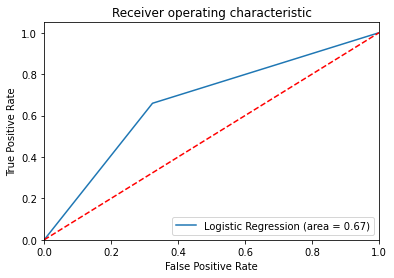

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()